### Notebook for analysing nf pipeline output

#### Sequencing batch 10 and 11

## Packages

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import glob
import numpy as np
import os

In [2]:
df_report_fnl = pd.read_excel('/home/douso/SarsGenomics/Processed/policy-brief-T005-6.xlsx')

In [3]:
#clrs = pd.read_html('https://www.rapidtables.com/web/css/css-color.html')

In [4]:
df_report_fnl.sort_values('Date Collection (dd-mm-yyyy)')#.head()

,Sequence Name,coverage,Date Collection (dd-mm-yyyy),Date Received (dd-mm-yyyy),Pango Lineage Annotation,Next Clade Lineage Annotation,WHO Annotation,Sample County of Origin,Gender,Subject Country of Origin,MoC-S-Protein
0,COVC03617,98.6,2020-07-06,NaT,B.1,20C,NaN,Nairobi,F,Kenya,NaN
1,COVC03665,95.9,2020-07-06,NaT,B.1,20C,NaN,Nairobi,M,Kenya,NaN
2,COVC03696,98.5,2020-07-06,NaT,B.1,20C,NaN,Nairobi,M,Kenya,NaN
3,COVC03723,99.2,2020-07-06,NaT,B.1,20C,NaN,Nairobi,M,Kenya,NaN
4,COVC03813,97.3,2020-07-10,NaT,B.1,20C,NaN,Nairobi,M,Kenya,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99,NHRL-S020,86.0,NaT,NaT,B.1.1.7,20I/501Y.V1,Nan,M,Kenya,A570D,NaN
100,NHRL-S028,75.2,NaT,NaT,B.1.1.7,20I/501Y.V1,Nan,F,Kenya,A570D,NaN
101,NHRL-S029,78.0,NaT,NaT,B.1.1.7,20I/501Y.V1,Nan,M,Kenya,A570D,NaN
102,NHRL-S032,79.8,NaT,NaT,B.1,20C,Nan,NaN,Kenya,NaN,NaN


In [5]:
(df_report_fnl['Sample County of Origin']
 .value_counts())

Nairobi     30
Kiambu      20
Mombasa     20
M           10
Garissa      8
Kajiado      6
F            6
Nakuru       1
Machakos     1
Name: Sample County of Origin, dtype: int64

In [6]:
clr_code = {'A.23': ('lime', '#00FF00'),
 'A.23.1': ('gray', '#808080'),
 'A.25': ('orangered', '#FF4500'),
 'B.1': ('cyan', '#00FFFF'),
 'B.1.1': ('chocolate', '#D2691E'),
 'B.1.1.171': ('teal', '#008080'),
 'B.1.1.406': ('slategray', '#708090'),
 'B.1.1.7': ('orange', '#FFA500'),
 'B.1.143': ('olive', '#808000'),
 'B.1.214': ('gold', '#8FBC8F'),
 'B.1.276': ('aquamarine', '#006400'),
 'B.1.336': ('tan', '#D2B48C'),
 'B.1.343': ('indigo', '#4B0082'),
 'B.1.349': ('mediumpurple', '#9370DB'),
 'B.1.351': ('blue', '#0000FF'),
 'B.1.388': ('sienna', '#A0522D'),
 'B.1.429': ('khaki', '#F0E68C'),
 'B.1.446': ('palevioletred', '#DB7093'),
 'B.1.525': ('green', '#008000'),
 'B.1.530': ('red', '#AFEEEE'),
 'B.1.549': ('brown', '#A52A2A'),
 'B.1.596.1': ('magenta', '#FF00FF'),
 'B.1.605': ('rosybrown', '#BC8F8F'),
 'B.1.617.2': ('paleturquoise', '#FF0000'),
 'B.1.517': ('yellow', '#FFFF00'),
 'TBA5': ('darkkhaki', '#BDB76B'),
 'TBA6': ('darkgreen', '#7FFFD4'),
 'TBA7': ('yellowgreen', '#9ACD32'),
 'TBA8': ('darkseagreen', '#FFD700'),
 'TBA9': ('seagreen', '#2E8B57')}#BLUES NEXT B.1.361
avail_clr = ['TBA5', 'TBA6', 'TBA7', 'TBA8', 'TBA9']

In [30]:
grpby_lins = (df_report_fnl.groupby('Pango Lineage Annotation')
        .count().sort_values('coverage', ascending=False))

In [31]:
max_count = grpby_lins['Sequence Name'].max()

In [32]:
clr_code_keys = list(clr_code.keys())

In [33]:
lins = list(grpby_lins.index)

In [34]:
len(lins)

11

In [35]:
lin_tba =  set(lins) - set(clr_code_keys)
lin_tba

set()

In [36]:
import pprint
for lin, clr in zip(lin_tba, avail_clr):
    clr_code[lin] = clr_code.pop(clr)
    avail_clr.remove(clr)

In [37]:
pprint.pprint(clr_code)
pprint.pprint(avail_clr)

{'A.23': ('lime', '#00FF00'),
 'A.23.1': ('gray', '#808080'),
 'A.25': ('orangered', '#FF4500'),
 'B.1': ('cyan', '#00FFFF'),
 'B.1.1': ('chocolate', '#D2691E'),
 'B.1.1.171': ('teal', '#008080'),
 'B.1.1.406': ('slategray', '#708090'),
 'B.1.1.7': ('orange', '#FFA500'),
 'B.1.143': ('olive', '#808000'),
 'B.1.214': ('gold', '#8FBC8F'),
 'B.1.276': ('aquamarine', '#006400'),
 'B.1.336': ('tan', '#D2B48C'),
 'B.1.343': ('indigo', '#4B0082'),
 'B.1.349': ('mediumpurple', '#9370DB'),
 'B.1.351': ('blue', '#0000FF'),
 'B.1.388': ('sienna', '#A0522D'),
 'B.1.429': ('khaki', '#F0E68C'),
 'B.1.446': ('palevioletred', '#DB7093'),
 'B.1.517': ('yellow', '#FFFF00'),
 'B.1.525': ('green', '#008000'),
 'B.1.530': ('red', '#AFEEEE'),
 'B.1.549': ('brown', '#A52A2A'),
 'B.1.596.1': ('magenta', '#FF00FF'),
 'B.1.605': ('rosybrown', '#BC8F8F'),
 'B.1.617.2': ('paleturquoise', '#FF0000'),
 'TBA5': ('darkkhaki', '#BDB76B'),
 'TBA6': ('darkgreen', '#7FFFD4'),
 'TBA7': ('yellowgreen', '#9ACD32'),
 'TBA8':

In [38]:
clr_code

{'A.23': ('lime', '#00FF00'),
 'A.23.1': ('gray', '#808080'),
 'A.25': ('orangered', '#FF4500'),
 'B.1': ('cyan', '#00FFFF'),
 'B.1.1': ('chocolate', '#D2691E'),
 'B.1.1.171': ('teal', '#008080'),
 'B.1.1.406': ('slategray', '#708090'),
 'B.1.1.7': ('orange', '#FFA500'),
 'B.1.143': ('olive', '#808000'),
 'B.1.214': ('gold', '#8FBC8F'),
 'B.1.276': ('aquamarine', '#006400'),
 'B.1.336': ('tan', '#D2B48C'),
 'B.1.343': ('indigo', '#4B0082'),
 'B.1.349': ('mediumpurple', '#9370DB'),
 'B.1.351': ('blue', '#0000FF'),
 'B.1.388': ('sienna', '#A0522D'),
 'B.1.429': ('khaki', '#F0E68C'),
 'B.1.446': ('palevioletred', '#DB7093'),
 'B.1.525': ('green', '#008000'),
 'B.1.530': ('red', '#AFEEEE'),
 'B.1.549': ('brown', '#A52A2A'),
 'B.1.596.1': ('magenta', '#FF00FF'),
 'B.1.605': ('rosybrown', '#BC8F8F'),
 'B.1.617.2': ('paleturquoise', '#FF0000'),
 'B.1.517': ('yellow', '#FFFF00'),
 'TBA5': ('darkkhaki', '#BDB76B'),
 'TBA6': ('darkgreen', '#7FFFD4'),
 'TBA7': ('yellowgreen', '#9ACD32'),
 'TBA8':

In [39]:
df_report_fnl['Pango Lineage Annotation'].unique()

array(['B.1', 'B.1.1', 'B.1.276', 'B.1.517', 'B.1.549', 'A.25', 'B.1.1.7',
       'B.1.351', 'B.1.214', 'B.1.617.2', 'B.1.429'], dtype=object)

In [40]:
lins = list(grpby_lins.index)

In [41]:
lins

['B.1',
 'B.1.1.7',
 'B.1.549',
 'B.1.1',
 'B.1.276',
 'A.25',
 'B.1.214',
 'B.1.351',
 'B.1.429',
 'B.1.517',
 'B.1.617.2']

In [49]:
xlabels = ['B.1',
 'B.1.1.7(Alpha)',
 'B.1.549',
 'B.1.1',
 'B.1.276',
 'A.25',
 'B.1.214',
 'B.1.351(Beta)',
 'B.1.429',
 'B.1.517',
 'B.1.617.2(Delta)']

# [
#     'B.1',
#  'B.1.549',
#  'B.1.1.7(Alpha)',
#  'B.1.276',
#  'B.1.1',
#  'B.1.351(Beta)',
#  'A.25',
#  'B.1.517'
#  ]

In [50]:
(df_report_fnl['Pango Lineage Annotation']
 .value_counts())

B.1          69
B.1.1.7      13
B.1.549      12
B.1.1         2
B.1.276       2
A.25          1
B.1.214       1
B.1.517       1
B.1.429       1
B.1.617.2     1
B.1.351       1
Name: Pango Lineage Annotation, dtype: int64

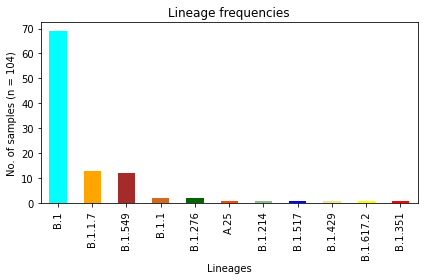

In [64]:
import math
# plot lineage frequencies
colors = [clr_code[lin][1] for lin in lins]
n = df_report_fnl['Pango Lineage Annotation'].count()
yticks = np.arange(0, (math.ceil(max_count / 5) + 1) * 5, 5)
fig, ax = plt.subplots()
(df_report_fnl['Pango Lineage Annotation']
 .value_counts()
 .plot(kind='bar', ax=ax, color=colors))
plt.title('Lineage frequencies')
plt.xlabel('Lineages')
# plt.yticks(yticks)
# plt.xticks(ticks=range(len(lins)), rotation=45, labels=xlabels)
plt.ylabel(f'No. of samples (n = {n})')
plt.tight_layout()
# fig.savefig('/home/douso/SarsGenomics/Processed/policy-brief-P005-6c.png', dpi=300.0)
plt.show()